# Time Series: 
<b>
    It's a sequence of discrete-timed data, i.e. series of data points indexed in successively equal space points in time.
</b> <br>
Components for Time Series 
1) Trend
2) Seasonal Variations
3) Cyclic Variations
4) Random or Irregular movements

# Trends: 
<b>The trend is the component of a time series that represents variations of low frequency in a time series, the high and medium frequency fluctuations having been filtered out. </b> <br>
The trend shows the general tendency of the data to increase or decrease during a long period of time. <br>
1) Upward <br>
2) Downward <br>
3) Horizontal/Stationary <br>

# Seasionality: 
<b>A repeating trend, i.e. The repeating short-term cycle in the series.  </b> <br>

# Cyclical Component:
Trends with no set repetitions

## Hodrick Prescott Filter
It helps to separate time series (y_t) into a trend component(τ_t) and cyclical component(c_t) <br>
It is achieved by minimising Quadratic Loss Function (wher α is considered to be smoothning parameter)

# Basics of Stats-Models

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("../Data/macrodata.csv",index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


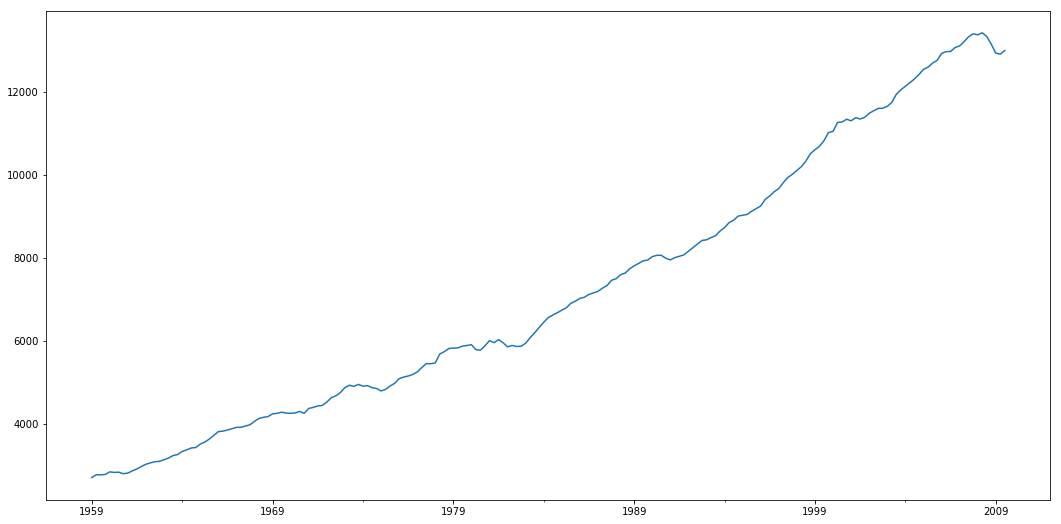

In [6]:
#line chart
df["realgdp"].plot(figsize=(18,9))

### Separating trend from data using Hodrick Prescott Filter

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [10]:
gdp_cylce, gdp_trend = hpfilter(df['realgdp'],lamb=1600)

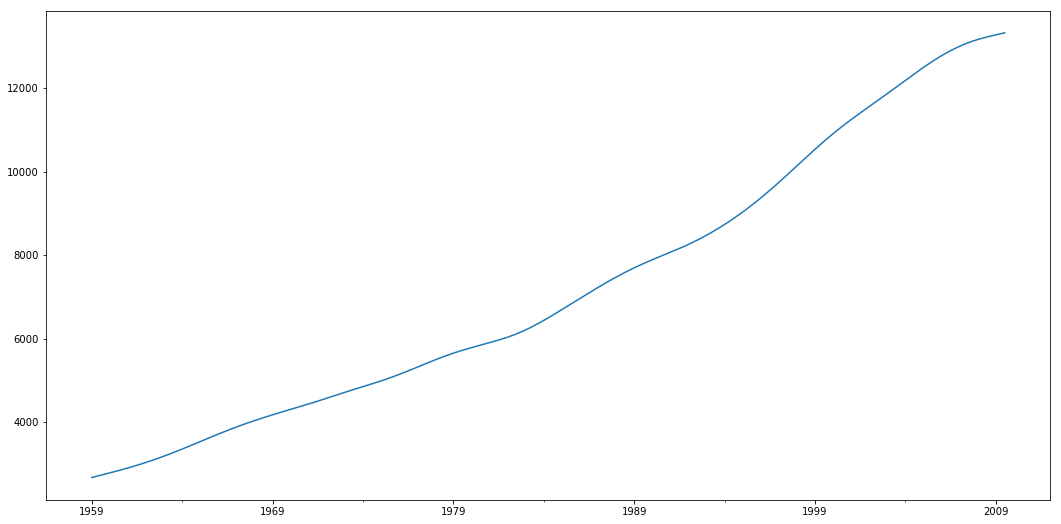

In [17]:
df["trend"]= gdp_trend
gdp_trend.plot(figsize=(18,9))

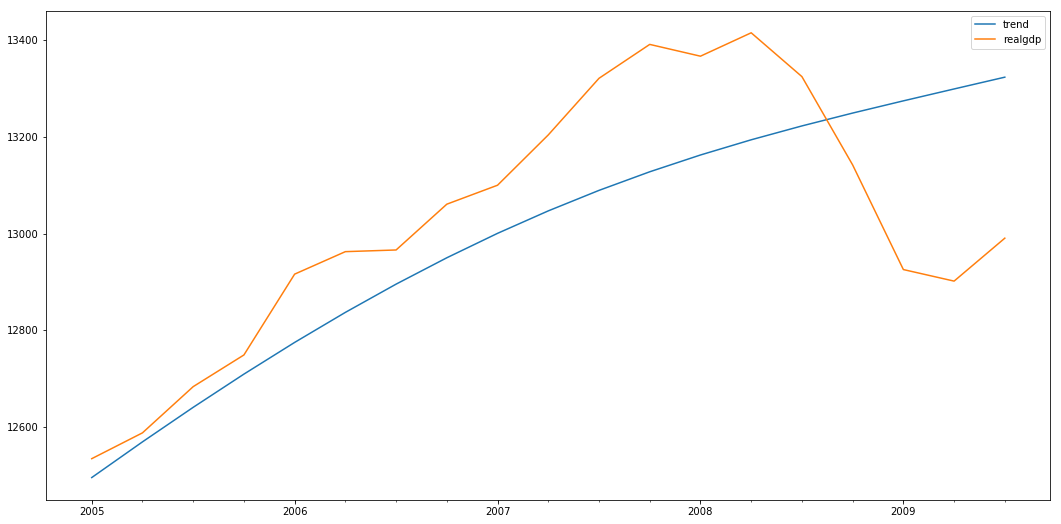

In [19]:
df[["trend","realgdp"]]['2005-01-01':].plot(figsize=(18,9))

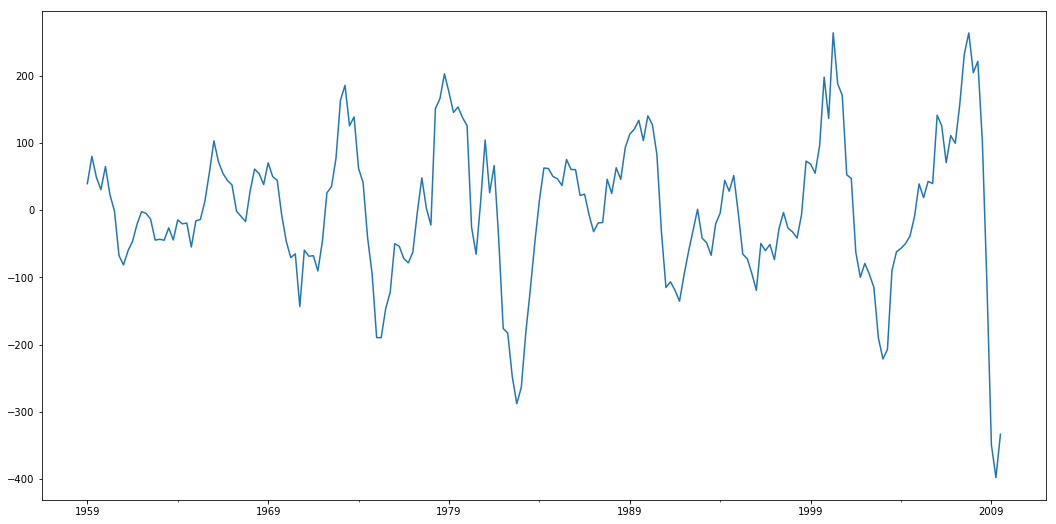

In [20]:
df['cycle'] = gdp_cylce
gdp_cylce.plot(figsize=(18,9))